# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Сиды фиксируются для выбора одинаковых случайных данных")

Сиды фиксируются для выбора одинаковых случайных данных


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [329]:
temp_train = df_train.copy()
temp_test = df_test.copy()

(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [252]:
# your code here
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6973,Tata Nexon 1.5 Revotorq XT,2018,800000,85000,Diesel,Individual,Manual,Second Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2638,Maruti Wagon R VXI,2006,135000,62900,Petrol,Individual,Manual,First Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
4256,Maruti Swift Dzire VDI,2019,675000,25000,Diesel,Individual,Manual,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
5699,Maruti Swift Dzire ZDI,2018,780000,30000,Diesel,Individual,Manual,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
2629,Maruti Omni E MPI STD BS IV,2016,190000,80000,Petrol,Individual,Manual,Second Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
5512,Tata Indica V2 LSi,2008,85000,25000,Petrol,Individual,Manual,Second Owner,16.84 kmpl,1193 CC,64.4 bhp,99.8Nm@ 2700rpm,5.0
4885,Tata Nano Twist XE,2015,110000,15000,Petrol,Individual,Manual,First Owner,25.4 kmpl,624 CC,37.5 bhp,51Nm@ 4000+/-500rpm,4.0
1964,Maruti Omni 8 Seater BSII,2010,130000,120000,Petrol,Individual,Manual,Third Owner,19.7 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,8.0
2343,Ford EcoSport 1.5 Ti VCT AT Titanium BSIV,2015,775000,30000,Petrol,Individual,Automatic,First Owner,15.63 kmpl,1499 CC,110.4 bhp,140Nm@ 4400rpm,5.0
5179,Mahindra TUV 300 T8,2017,700000,40000,Diesel,Individual,Manual,First Owner,18.49 kmpl,1493 CC,100 bhp,240Nm@ 1600-2800rpm,7.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [253]:
# your code here
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [254]:
# your code here
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [255]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [256]:
# your code here
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [257]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Пропуски есть в колонках: mileage, engine, max_power, torque, seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [4]:
# your code here
df = df_train.drop('selling_price', axis=1)
df.duplicated().sum()


1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [331]:
# your code here
df[df.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [5]:
# your code here
df_train = df_train[~df.duplicated()]


In [6]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [7]:
# your code here
df_train = df_train.reset_index(drop=True)


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [8]:
def get_num(value):
    if type(value) == str:
        value = ''.join([c for c in value if c.isdigit() or c == '.'])
    if value != '':
        value = float(value)
    return value 

In [9]:
# your code here
df_train['mileage'] = df_train.mileage.apply(get_num)
df_train['engine'] = df_train.engine.apply(get_num)
df_train['max_power'] = df_train.max_power.apply(get_num)
df_train['max_power']= pd.to_numeric(df_train.max_power)

In [10]:

df_test['mileage'] = df_test.mileage.apply(get_num)
df_test['engine'] = df_test.engine.apply(get_num)
df_test['max_power'] = df_test.max_power.apply(get_num)
df_test['max_power']= pd.to_numeric(df_test.max_power)

In [11]:
def get_first_torque(torque):
    if  type(torque) == str and torque != '':
        torque = float(''.join([c for c in torque.split()[0] if c.isdigit() or c == '.']))
    return torque

In [12]:
def get_second_torque(torque):
    if type(torque) == str and torque != '':
        lst = torque.split()
        if len(lst) > 1:
            torque = ''.join([c for c in torque.split()[1] if c.isdigit() or c in '.-'])
            lst2 = torque.split('-')
            if len(lst2) == 2:
                torque = (float(lst2[0]) + float(lst2[1]))/2
        else:
            torque = np.nan
    return torque

In [13]:
df_train['max_torque_rpm'] = df_train.torque.apply(get_second_torque)
df_train['torque'] = df_train.torque.apply(get_first_torque)

In [14]:
df_test['max_torque_rpm'] = df_test.torque.apply(get_second_torque)
df_test['torque'] = df_test.torque.apply(get_first_torque)

In [15]:
df_train['max_torque_rpm']= pd.to_numeric(df_train.max_torque_rpm)

df_test['max_torque_rpm']= pd.to_numeric(df_test.max_torque_rpm)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [16]:
# your code here
df_train = df_train.fillna(df_train.median(numeric_only=True))


In [17]:
df_test = df_test.fillna(df_train.median(numeric_only=True))

In [18]:
df_train.isna().sum().sum()

0

In [19]:
df_test.isna().sum().sum()

0


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [361]:
print("число сидений лучше отнести к категориальным, т.к. имеет небольшое множество допустимых значений, к которым не корректно применять числовые операции.")

число сидений лучше отнести к категориальным, т.к. имеет небольшое множество допустимых значений, к которым не корректно применять числовые операции.


In [20]:
# your code here
df_train['engine']= pd.to_numeric(df_train.engine, downcast='integer')
df_train['seats']= pd.to_numeric(df_train.seats, downcast='integer')

df_test['engine']= pd.to_numeric(df_test.engine, downcast='integer')
df_test['seats']= pd.to_numeric(df_test.seats, downcast='integer')

In [351]:
df_train.dtypes

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine              int16
max_power         float64
torque            float64
seats                int8
max_torque_rpm    float64
dtype: object

In [363]:
df_train.to_csv('new_train.csv', index=False)
df_test.to_csv('new_test.csv', index=False)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

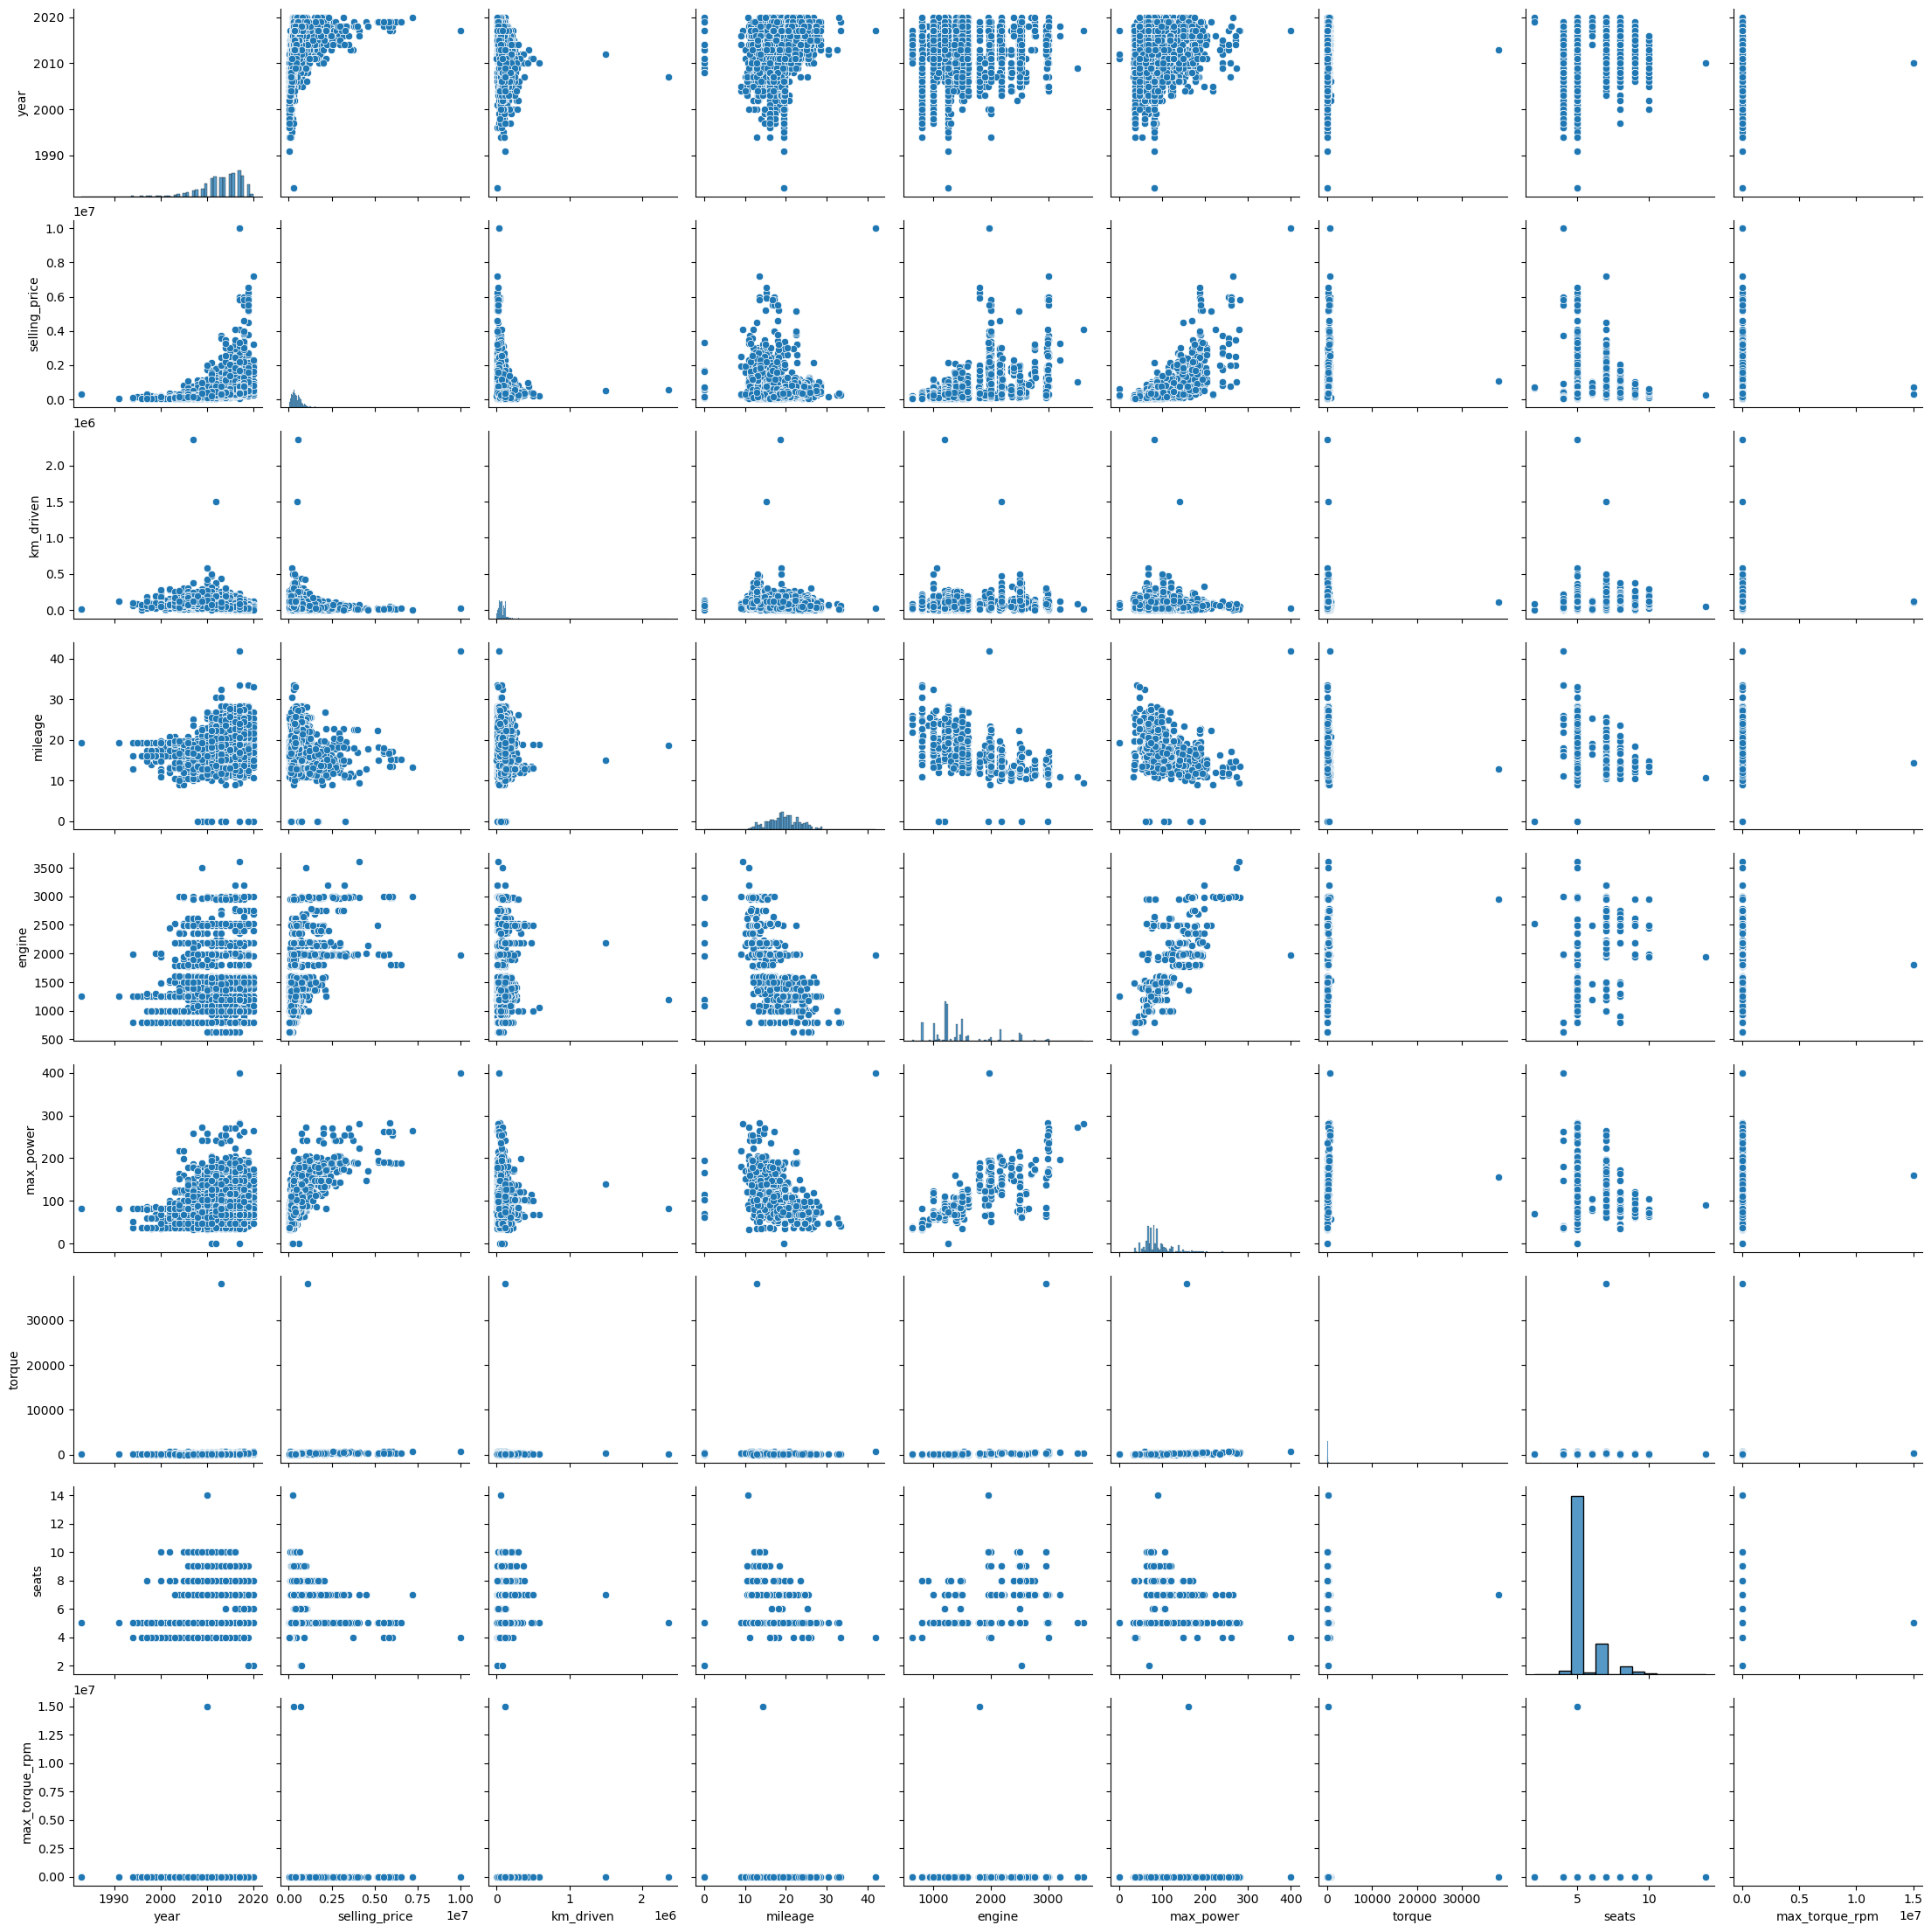

In [364]:
# your code here
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Основываясь на графики можно увидеть прямую свзь целевой переменной со следующими признаками: year, mileage, engine, max_power. Также можно предположить, что цена на автомобиль с большим значением в столбце km_driven будет низкой. Столбцы torque и max_torque_rpm не влияют на все признаки (заисключением одного выброса). Также можно проследить зависимость между engine -max_power.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

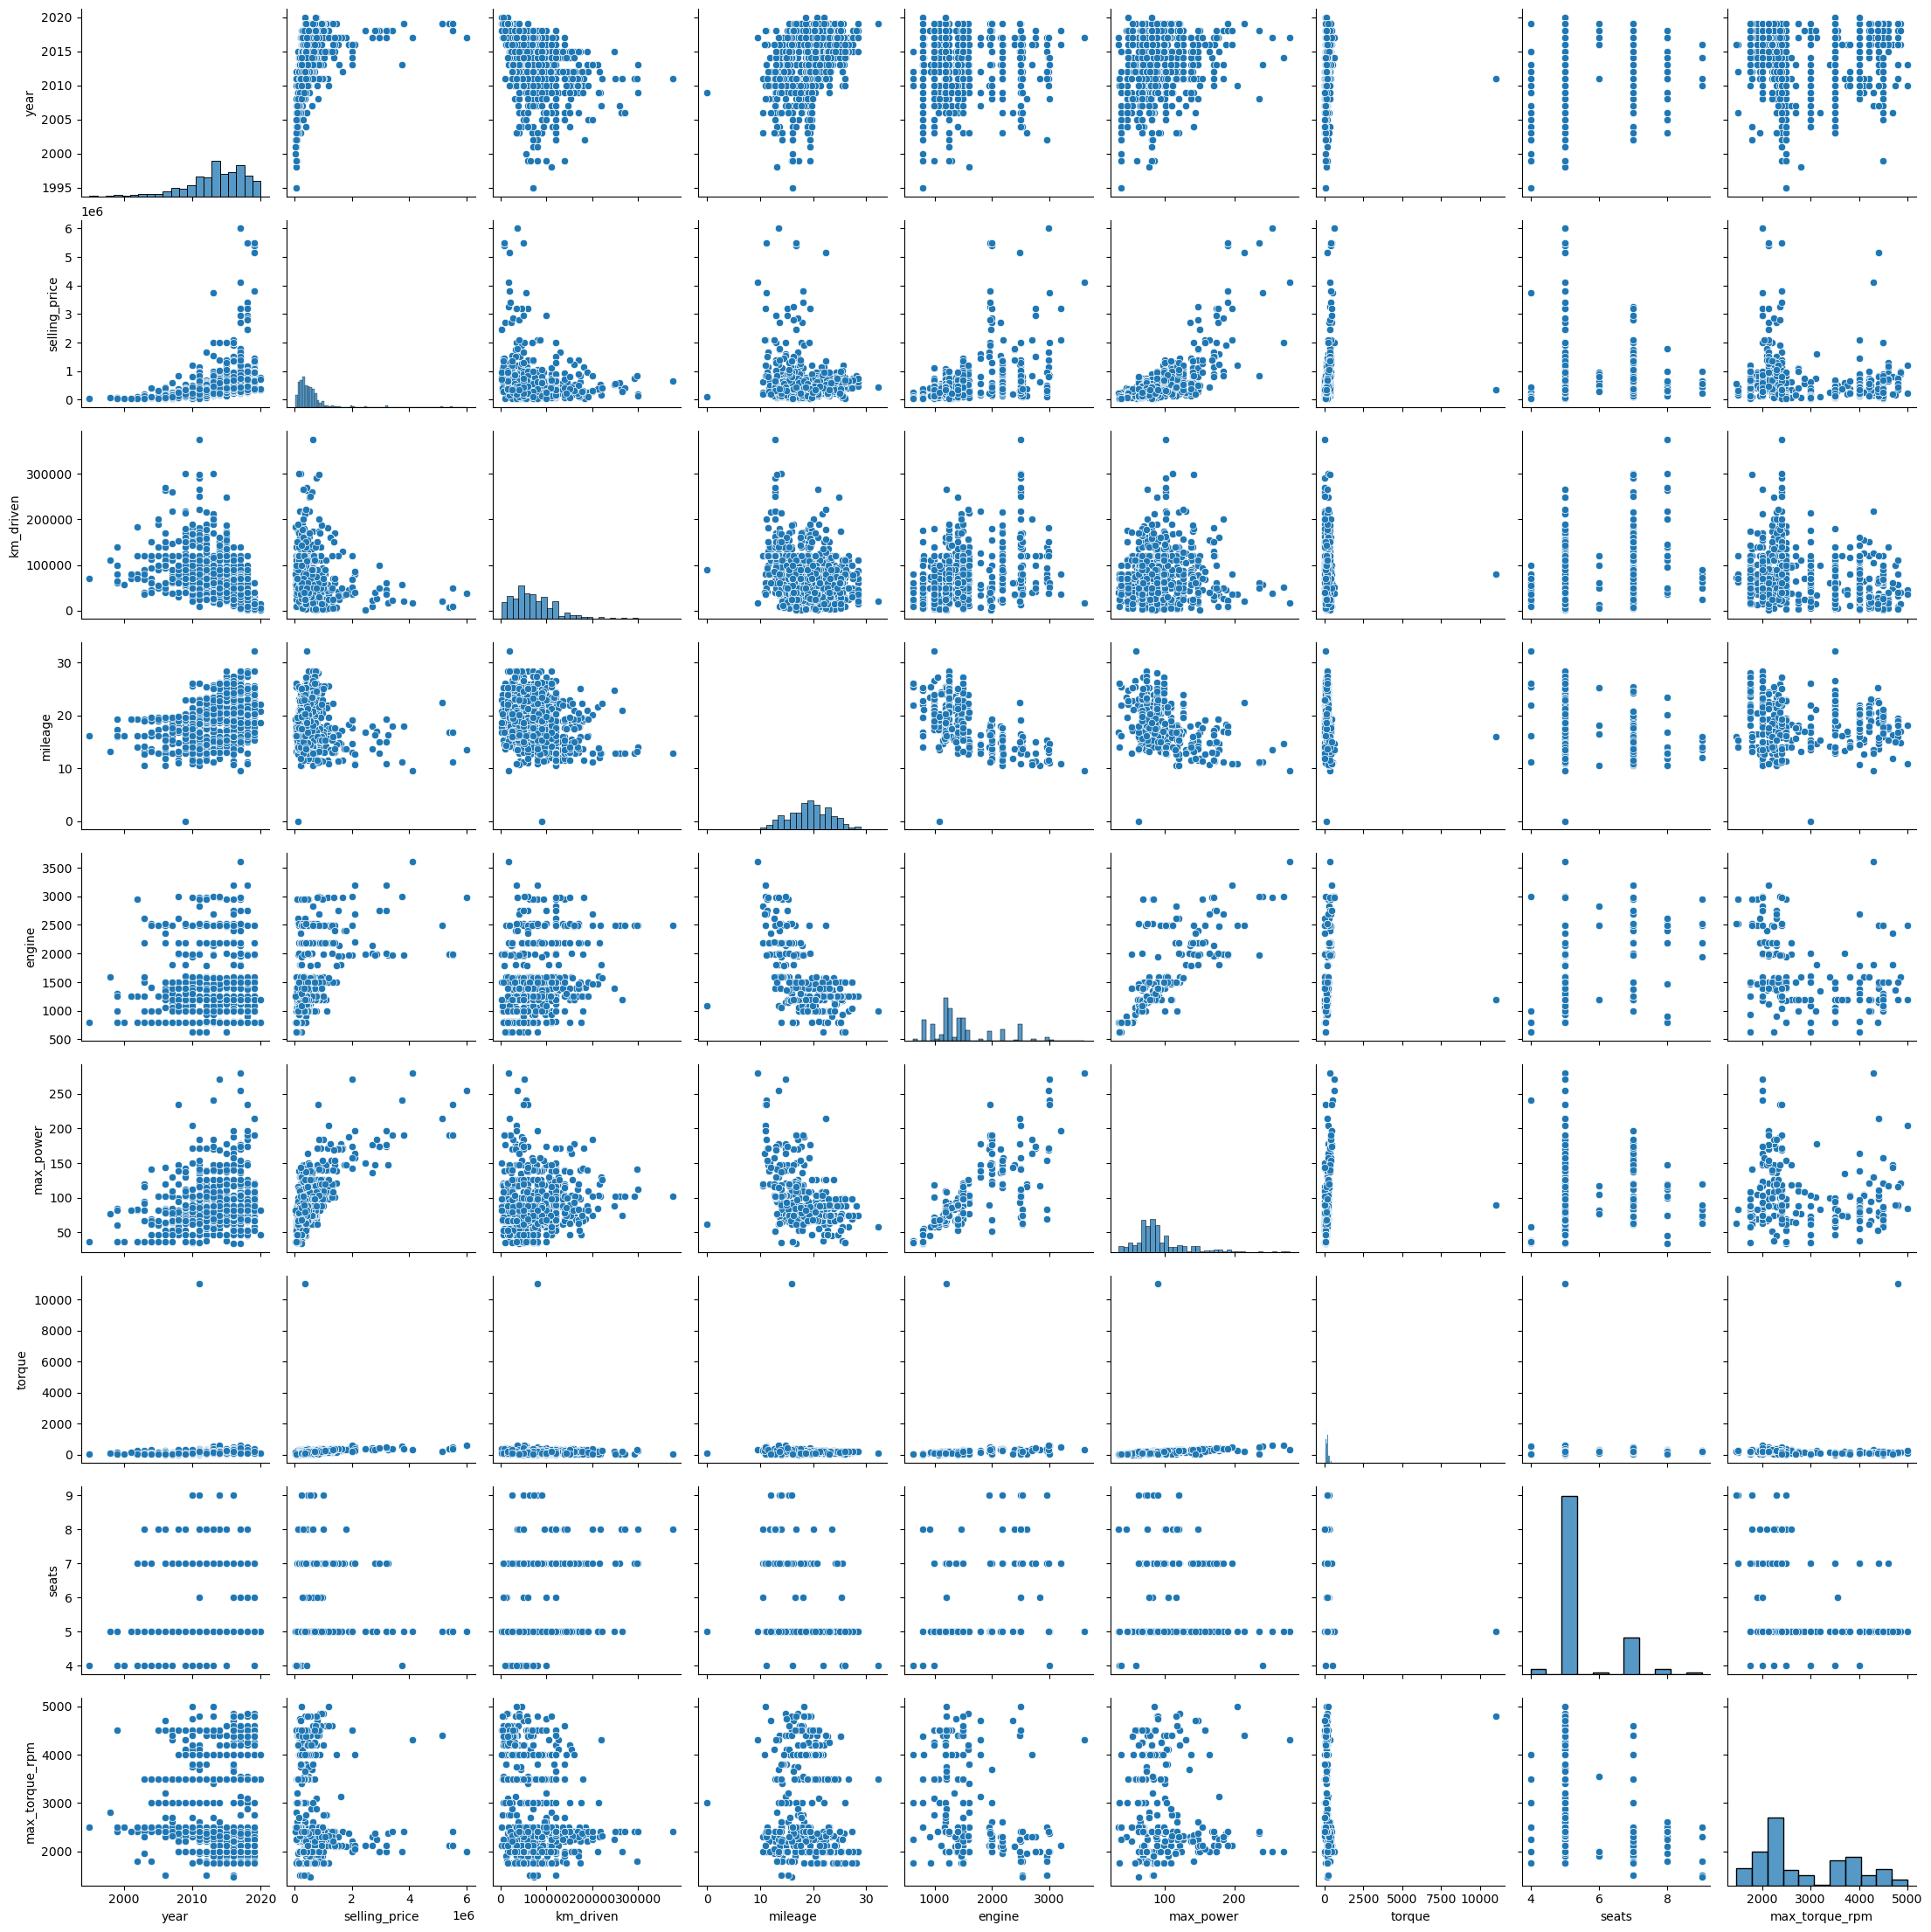

In [381]:
# your code here
sns.pairplot(df_test)
plt.show()

* Совокупности оказались похожи, за исключением признака max_torque_rnd

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

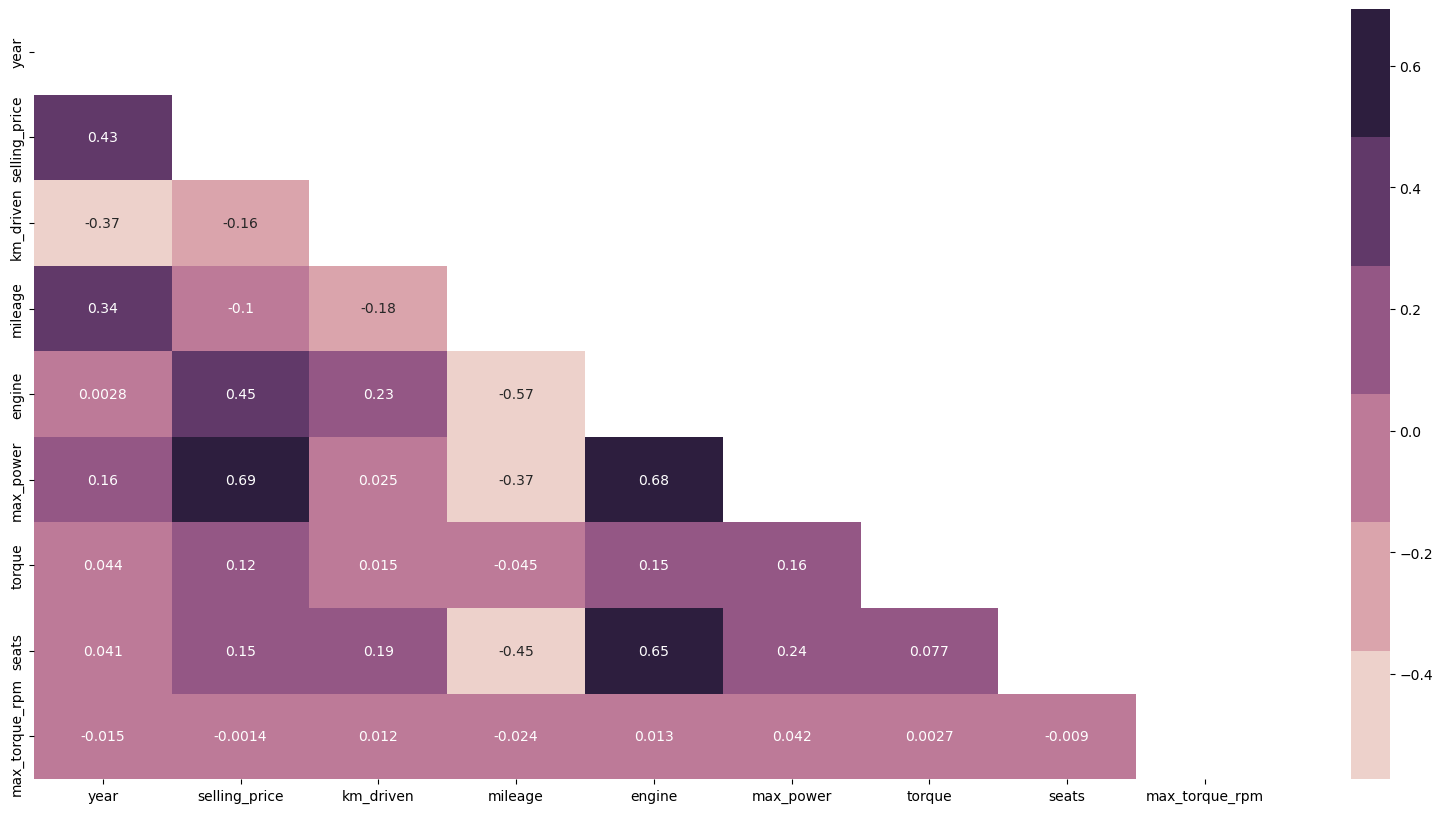

In [383]:
# your code here
matrix = np.triu(df_train.corr())
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(), annot = True, cmap=sns.cubehelix_palette(as_cmap=False), mask = matrix)
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

* Наименее скоррелированы следующие пары: engine-year, max_torque_rnd-torque, max_torque_rnd-selling_price
* Положительная зависимость наблюдается у пар: selling_price-max_power, max_power-engine, seats-engine
* Да, между годом и количеством проеханных километров не маленькая отрицательная корреляция(-0,37)

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

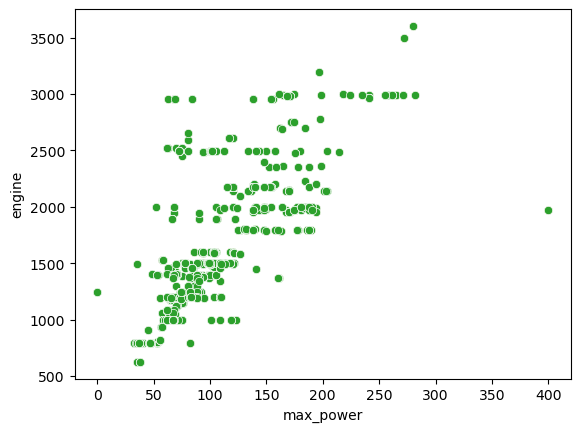

In [379]:
# your code here
sns.scatterplot(x='max_power', y='engine', data=df_train)
plt.xlabel('max_power')
plt.ylabel('engine')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

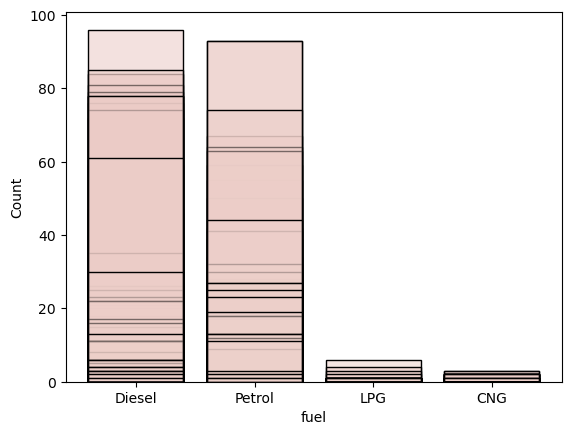

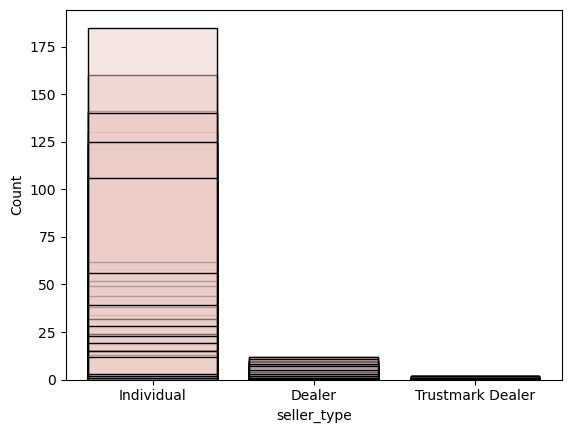

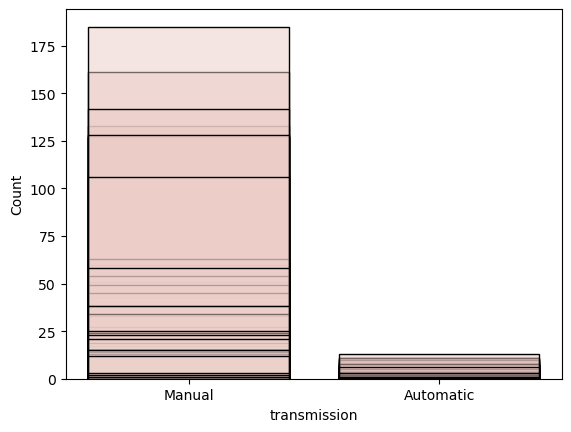

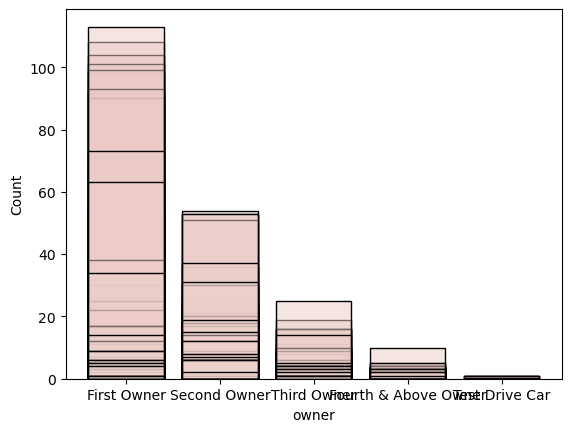

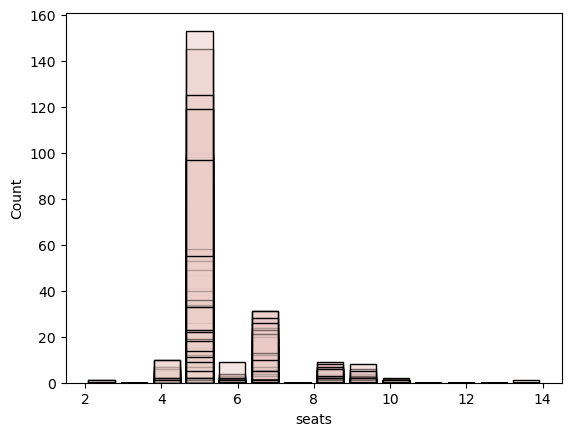

In [141]:
# your code here
# категориальные признаки
cat_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
for col in cat_features:
    sns.histplot(data=df_train, x=col, hue='selling_price', legend=False, shrink=.8)
    plt.show()

                

На основе гистограммы признака seller_type можно сказать, что значениям столбцов Dealer и Trustmark Dealer в большей степени соответсвует высокая цена. По гистограммам признаков transmission, owner, seats видно, что большинство машин выставленных на продажу имеют ручную коробку передач или одного владельца, большинство машин имеют  посадочных мест.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [21]:
y_train = df_train['selling_price']# your code here
X_train = df_train.select_dtypes(include='number')# your code here
X_train = X_train.drop(columns=['selling_price', 'torque', 'max_torque_rpm'])

In [22]:
assert X_train.shape == (5840, 6)

In [23]:
y_test =  df_test['selling_price']# your code here
X_test = df_test.select_dtypes(include='number')# your code here
X_test = X_test.drop(columns=['selling_price', 'torque', 'max_torque_rpm'])

In [24]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
lr = LinearRegression()
lr.fit(X_train, y_train)
# your code here

LinearRegression()

In [26]:
pred_lr = lr.predict(X_test)
print(r2_score(y_test, pred_lr))
print(r2_score(y_train, lr.predict(X_train)))

0.5941419794788412
0.5922591702157305


In [27]:
print(MSE(y_test, pred_lr))
print(MSE(y_train, lr.predict(X_train)))

233298779730.45587
116874153930.02885


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.fit_transform(X_test)
# your code here

In [82]:
lr_stand = LinearRegression()
lr_stand.fit(X_train_stand, y_train)
pred_lr_stand = lr_stand.predict(X_test_stand)
print('r2_score')
print(r2_score(y_test, pred_lr_stand))
print(r2_score(y_train, lr_stand.predict(X_train_stand)))
print('MSE')
print(MSE(y_test, pred_lr_stand))
print(MSE(y_train, lr_stand.predict(X_train_stand)))

r2_score
0.5653757516430639
0.5922591702157303
MSE
249834428928.46213
116874153930.02892


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [86]:
# your code here
lr_stand.coef_

array([152772.57084581, -44158.81852005,  28833.92577752,  61178.49433685,
       322807.35325923, -23209.132486  ])

* Наиболее информативный признак - max_power

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [175]:
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(X_train_stand, y_train)
pred_ls = ls.predict(X_test_stand)
print('r2_score')
print(r2_score(y_test, pred_ls))
print(r2_score(y_train, ls.predict(X_train_stand)))
print('MSE')
print(MSE(y_test, pred_ls))
print(MSE(y_train, ls.predict(X_train_stand)))
# your code here

r2_score
0.5653744969752247
0.5922591701804456
MSE
249835150147.36395
116874153940.1429


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

* Нет не занулила, потому что нет незначимых признаков.

In [176]:
# your code here
ls.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [36]:
from sklearn.model_selection import GridSearchCV

In [186]:
%%time

ls_t = Lasso()
parametrs = {'alpha': np.arange(1000,10001,1000), 'max_iter' : np.arange(100,1001,100), 'tol': np.arange(0.00001,0.00011, 0.00002)}

grid = GridSearchCV(ls_t, parametrs, scoring='r2', cv=10)
grid.fit(X_train_stand, y_train)



# your code here

Wall time: 21.4 s


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000]),
                         'max_iter': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
                         'tol': array([1.e-05, 3.e-05, 5.e-05, 7.e-05, 9.e-05])},
             scoring='r2')

In [187]:
grid.best_params_

{'alpha': 10000, 'max_iter': 100, 'tol': 1e-05}

In [188]:
ls = Lasso(alpha=10000, max_iter=100, tol=0.00001)
ls.fit(X_train_stand, y_train)
pred_ls = ls.predict(X_test_stand)
print('r2_score')
print(r2_score(y_test, pred_ls))
print(r2_score(y_train, ls.predict(X_train_stand)))
print('MSE')
print(MSE(y_test, pred_ls))
print(MSE(y_train, ls.predict(X_train_stand)))

r2_score
0.5519736935086812
0.5892501556134029
MSE
257538314648.4318
117736652875.73468


In [189]:
ls.coef_

array([151822.14364874, -32734.5713485 ,   9276.86860741,  17844.11015739,
       329223.28043778,     -0.        ])

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

* Грид-сёрч обучил 5000 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>


Лучший коэффициент регуляризации 10000. Примечательно, что это максимальный элемент для перебора параметра регуляризации. Также замечено, что произошло зануление признака seats, что может быть связанно с преобладающим числом сидений (5).

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [184]:
%%time
from sklearn.linear_model import ElasticNet
en = ElasticNet()
parametrs = {'alpha': np.arange(1000,10001,1000), 'l1_ratio' : np.arange(0.1,1.1, 0.1), 'max_iter' : np.arange(100,1001,200), 'tol': np.arange(0.00001,0.0001, 0.00001)}

grid = GridSearchCV(en, parametrs, cv=10)
grid.fit(X_train_stand, y_train)


# your code here

Wall time: 2min 42s


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'max_iter': array([100, 300, 500, 700, 900]),
                         'tol': array([1.e-05, 2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05,
       9.e-05])})

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [185]:
# your code here
grid.best_params_

{'alpha': 10000, 'l1_ratio': 1.0, 'max_iter': 100, 'tol': 1e-05}

In [180]:
eln = ElasticNet(alpha=10000, l1_ratio=1.0, max_iter=100, tol=0.00001)
eln.fit(X_train_stand, y_train)
pred_eln = eln.predict(X_test_stand)
print('r2_score')
print(r2_score(y_test, pred_eln))
print(r2_score(y_train, eln.predict(X_train_stand)))
print('MSE')
print(MSE(y_test, pred_eln))
print(MSE(y_train, eln.predict(X_train_stand)))

r2_score
0.5519736935086812
0.5892501556134029
MSE
257538314648.4318
117736652875.73468


In [181]:
eln.coef_

array([151822.14364874, -32734.5713485 ,   9276.86860741,  17844.11015739,
       329223.28043778,     -0.        ])

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [259]:
# your code here
X_train_cat = df_train.drop(columns=['name', 'selling_price', 'torque', 'max_torque_rpm'])
X_test_cat = df_test.drop(columns=['name', 'selling_price', 'torque', 'max_torque_rpm'])

In [235]:
assert X_train_cat.shape == (5840, 10)

In [208]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [240]:
X_test_cat.shape

(1000, 10)

In [265]:
all_date.shape

(6840, 23)

In [262]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
cat_dum_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
all_date = pd.concat([X_train_cat, X_test_cat])
all_date = pd.get_dummies(all_date, drop_first=True, columns=cat_dum_cols)

X_train_cat = all_date.head(5840)
X_test_cat = all_date.tail(1000)
#X_train_cat = pd.get_dummies(X_train_cat, drop_first=True, columns=cat_dum_cols)
# your code here

In [222]:
X_test_cat = pd.get_dummies(X_test_cat, drop_first=True, columns=cat_dum_cols)

In [284]:
X_test_cat.to_csv('alalla.csv', index=False)

In [269]:
scaler = StandardScaler()
X_train_cat_stand = scaler.fit_transform(X_train_cat)
X_test_cat_stand = scaler.fit_transform(X_test_cat)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [224]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rdg = Ridge()
parametr = {'alpha' : np.arange(1000, 30001, 1000), 'max_iter' : np.arange(100,1001,100), 'tol': np.arange(0.00001,0.00011, 0.00002)}

grid = GridSearchCV(rdg, parametr, scoring='r2', cv=10)
grid.fit(X_train_cat_stand, y_train)
# your code here

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000,
       19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000,
       28000, 29000, 30000]),
                         'max_iter': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
                         'tol': array([1.e-05, 3.e-05, 5.e-05, 7.e-05, 9.e-05])},
             scoring='r2')

In [246]:
grid.best_params_

{'alpha': 1000, 'max_iter': 100, 'tol': 1e-05}

In [278]:
rdg = Ridge(alpha=1000, max_iter=100, tol=0.00001)
rdg.fit(X_train_cat_stand, y_train)
pred_rdg = rdg.predict(X_test_cat_stand)
print('r2_score')
print(r2_score(y_test, pred_rdg))
print(r2_score(y_train, rdg.predict(X_train_cat_stand)))
print('MSE')
print(MSE(y_test, pred_rdg))
print(MSE(y_train, rdg.predict(X_train_cat_stand)))

r2_score
0.5690384477667861
0.6578412425125626
MSE
247729006605.92032
98075817700.79811


In [280]:
rdg.coef_

array([128658.73558128, -35373.31503554,  19804.86113424,  61647.57809681,
       220545.43400334,  19818.94256623,   6760.04350724, -18520.48674181,
       -34948.40315655,  -6132.4610184 , -87756.98659996,  -9605.70812554,
       -28289.05557614,  76798.77290417, -15312.36838218,  53107.9125142 ,
        -8622.18619597,  -7990.16011386,  -3466.74302487,  -2489.63959594,
        -6026.05344714,  -3169.99670041,  -2926.75766729])

In [276]:
import pickle

In [282]:
pkl_filename = 'ridge.pkl'
decision_model = open(pkl_filename, 'wb')
pickle.dump(rdg, decision_model)
decision_model.close()

* Предсказания улучшились незначительно

In [295]:
XXX = df_train.drop(columns=['name', 'selling_price'])
XXX = pd.get_dummies(XXX, drop_first=True, columns=cat_dum_cols)
XXX.to_csv('alalla.csv', index=False)


In [291]:
XXX.shape

(5840, 25)

In [296]:
scaler = StandardScaler()
XXX = scaler.fit_transform(X_train_cat)
print(XXX.shape
rdg2 = Ridge(alpha=1000, max_iter=100, tol=0.00001)
rdg2.fit(XXX, y_train)

pkl_filename = 'ridge.pkl'
decision_model = open(pkl_filename, 'wb')
pickle.dump(rdg2, decision_model)
decision_model.close()


(5840, 25)


# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [275]:
def business_metrics(y_true, y_pred):
    y_division = y_true / y_pred
    pred_prop = 0
    for index, value in y_division.items():
        if abs(value) <= 1.1 and abs(value) >= 0.909:
            pred_prop += 1
    return str((pred_prop / len(y_true))*100)+'%'
            
    # your code here

business_metrics(y_test, pred_ls)

'24.2%'

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link